# Описание проекта

Мы аналитики в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

**Задача:**

Сформируйте модель монетизации игрового приложения.

Многие игры зарабатывают с помощью рекламы. И все они сталкиваются с противоречием:

- Пользователь разозлится и уйдёт, если начать показывать ему рекламу раньше, чем игра его затянет.
- Но  чем позже создатели игры включат рекламу, тем меньше они заработают.

**Описание данных:**

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом (стратегия воин)
- Реализация проекта - разработка орбитальной сборки спутников (стратегия строитель)

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет *ad_cost.csv* содержит колонки:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

# Материалы
Ссылка на презентацию: https://disk.yandex.ru/i/Yn_ZHv-q-fb0TA

Дашборд: https://public.tableau.com/profile/dmitriy4555#!/vizhome/Book1_16135042404810/Dashboard2?publish=yes

## Открыть таблицы с данными и изучить общую информацию

In [1]:
import pandas as pd
from IPython.core.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
game = pd.read_csv('/datasets/game_actions.csv')
cost = pd.read_csv('/datasets/ad_costs.csv')
user_sourse = pd.read_csv('/datasets/user_source.csv')

In [3]:
# функция для проверка датафреймов
def check_data(data):
    display(data.head(10))
    print('_________________________________________')
    print(data.info())
    print('_________________________________________')
    print('Пропущенных значений по столбцам:')
    print(data.isna().sum())
    print('_________________________________________')
    print('Дублирующих строк:')
    print(data.duplicated().sum())

In [4]:
check_data(game)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN


_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB
None
_________________________________________
Пропущенных значений по столбцам:
event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64
_________________________________________
Дублирующих строк:
1


In [5]:
# изменим тип данных
game['event_datetime'] = pd.to_datetime(game['event_datetime'])

# уберем дублирующую строку
game = game.drop_duplicates()

game.describe().T

,count,unique,top,freq,first,last
event_datetime,135639,128790,2020-05-09 12:35:56,4,2020-05-04 00:00:01,2020-06-05 12:32:49
event,135639,3,building,127956,NaT,NaT
building_type,127956,3,spaceport,59325,NaT,NaT
user_id,135639,13576,bf542075-e3a2-4e79-82d8-3838e86d2a25,22,NaT,NaT
project_type,1866,1,satellite_orbital_assembly,1866,NaT,NaT


В датасете game 135640 строк и 5 столбцов с событиями из игры за период с 2020-05-04 по 2020-06-05. Для работы с данными потребовалась следующая предобработка:
 - изменить тип столбца event_datetime;
 - удалить 1 дублирующую строку;
 - пропуски в столбце building_type обусловлены тем, что в данном действии постройки не происходило (например, игрок перешел на новый уровень), а пропуски в столбце project_type обусловлены отсутствием реализованного проекта, поэтому данные пропуски оставляем без изменений.

In [6]:
check_data(cost)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
None
_________________________________________
Пропущенных значений по столбцам:
source    0
day       0
cost      0
dtype: int64
_________________________________________
Дублирующих строк:
0


In [7]:
# изменям тип данных
cost['day'] = pd.to_datetime(cost['day'])

print(cost['day'].min(), '-', cost['day'].max())

2020-05-03 00:00:00 - 2020-05-09 00:00:00


В датасете cost данные о затратах на ресурсы маркетинга по дням с 2020-05-03 по 2020-05-09. В качестве предобработки потребовалось изменить тип данных в столбце day.

In [8]:
check_data(user_sourse)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
5,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
6,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
7,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct


_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB
None
_________________________________________
Пропущенных значений по столбцам:
user_id    0
source     0
dtype: int64
_________________________________________
Дублирующих строк:
0


В датасете user_sourse данные об источниках привлечения пользователей на 13576 строках и 2 столбцах. 
В последствии предобработки можно преступить к анализу данных.

## Исследовательский анализ данных

### посмотреть количество уникальных пользователей прошедших и не прошедших первый уровень

In [9]:
game

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


Количество уникальных игроков: 13576
Количество игроков прошедших 1 уровень: 5817
Количество игроков не прошедших 1 уровень: 7759


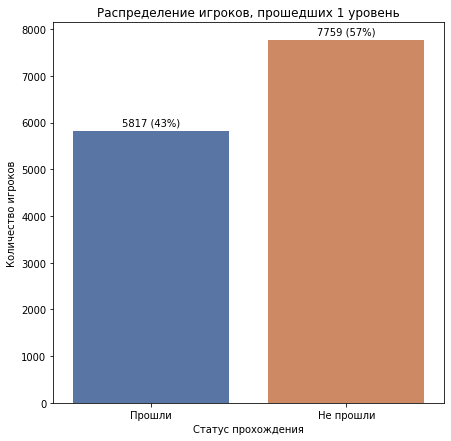

In [10]:
# группируем уникальных юзеров по событиям
user_event = game.pivot_table(index='user_id', columns='event', values='event_datetime', aggfunc='count').reset_index()

# заменяем проруск на 0
user_event['finished_stage_1'] = user_event['finished_stage_1'].fillna('0')
user_event['project'] = user_event['project'].fillna('0')
# расчеты
print('Количество уникальных игроков:',len(user_event))
print('Количество игроков прошедших 1 уровень:' ,user_event[user_event['finished_stage_1'] == 1]['finished_stage_1'].count())
print('Количество игроков не прошедших 1 уровень:', len(user_event) - user_event[user_event['finished_stage_1'] == 1]
      ['finished_stage_1'].count())

# группируем игроков по прохождения 1 уровня и строим график
status = user_event.groupby('finished_stage_1')['user_id'].count().reset_index()
plt.figure(figsize=(7, 7))
plot = sns.barplot(data=status, x=status['finished_stage_1'].replace({1: 'Прошли', '0': 'Не прошли'}), y='user_id', palette='deep')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f')+' ('+ format(p.get_height()/len(user_event)*100, '.0f') + '%)',
     (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Распределение игроков, прошедших 1 уровень')
plt.xlabel('Статус прохождения')
plt.ylabel('Количество игроков')
plt.show()

Из 13576 уникальных пользователей в данных 7759 (57%) пользователей не завершили первый уровень и 5817 (43%) прошли. Необходимо дополнительно проанализировать почему пользователи не дошли до 1 уровня (они еще не успели или забросили игру, и если забросили, то найти причину).

### распределить прошедших пользователей в зависимости от стратегии прохождения (победа над врагом или реализация проекта)

In [11]:
# меняем формат на целочисленный
user_event['building'] = user_event['building'].astype(int)
user_event['finished_stage_1'] = user_event['finished_stage_1'].astype(int)
user_event['project'] = user_event['project'].astype(int)

# Функция для определения стратегии игры
def strategys(row):
    if (row['finished_stage_1'] == 1) & (row['project'] == 1):
        return 'builder'
    if (row['finished_stage_1'] == 1) & (row['project'] == 0):
        return 'warrior'
    return 'failed'
user_event['strategy'] = user_event.apply(strategys, axis = 1)

event,strategy,user_id,prc
1,failed,7759,57.152328
2,warrior,3951,29.102829
0,builder,1866,13.744844


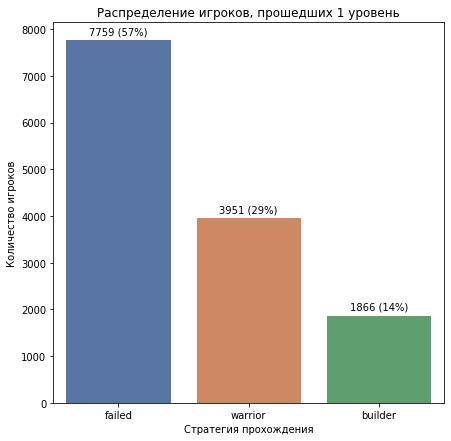

In [12]:
# группируем по стратегии
group_strategy = user_event.groupby('strategy').count().reset_index().sort_values(by='user_id', ascending=False)
group_strategy['prc'] = group_strategy['user_id'] / len(user_event) * 100
display(group_strategy[['strategy', 'user_id', 'prc']])
# строим график
plt.figure(figsize=(7, 7))
plot = sns.barplot(data=group_strategy, x='strategy', y = 'finished_stage_1', palette='deep')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f')+' ('+ format(p.get_height()/len(user_event)*100, '.0f') + '%)',
     (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Распределение игроков, прошедших 1 уровень')
plt.xlabel('Стратегия прохождения')
plt.ylabel('Количество игроков')
plt.show()

У 43% пользователей, прошедших 1 уровень, различалась стратегия прохождения. 29% прошли по тактике "воин" и только 14% по тактике "строитель". Учитывая, что наша модель монетизации — это показ рекламы на стадии выбора постройки, то нам интересно почему тактику строитель выбирает меньшее количество людей, причины могут быть следующие:
    - стратегия воин банально интереснее;
    - пользователи выбирают стратегию воин, так как в ней нужно меньше строить, и соответственно смотреть меньше рекламы;
    - в игре нарушен баланс между стратегиями, поэтому игроки выбирают более выгодную для дальнейшего развития.

### посмотреть метрику DAU

Среднее количество уникальных пользователей в день: 2884


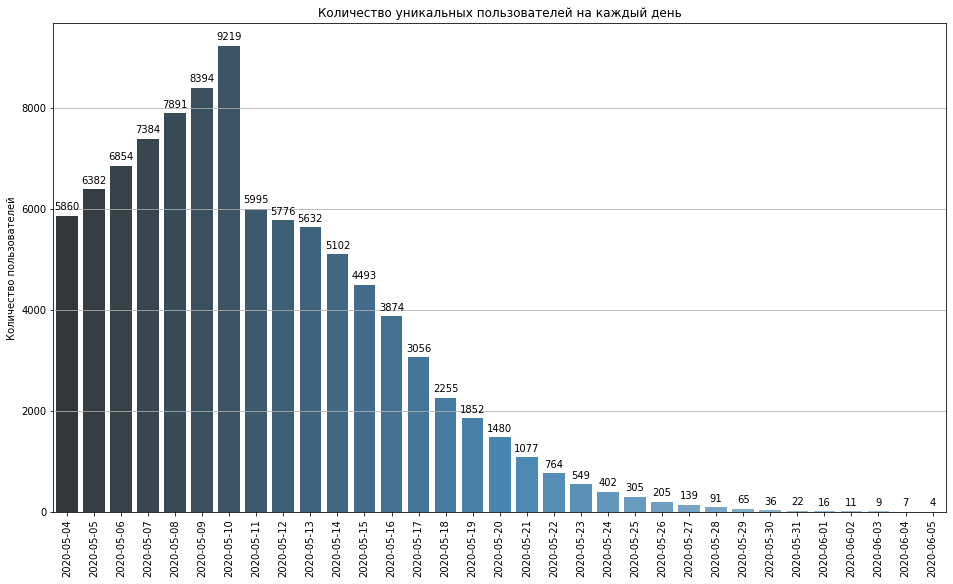

In [13]:
# добавим дату без времени
game['event_date'] = game['event_datetime'].dt.date

# группировка по уникальному юзеру в день
dau_total = game.groupby('event_date')['user_id'].agg('nunique').reset_index()
dau = game.groupby('event_date').agg({'user_id': 'nunique'}).mean()
print('Среднее количество уникальных пользователей в день:' ,int(dau))

# график по дням
plt.figure(figsize=(16, 9))
plt.title('Количество уникальных пользователей на каждый день')
plot = sns.barplot(data=dau_total, x='event_date', y='user_id', palette="Blues_d")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
     (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.grid(axis='y')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.show()

В среднем, в день играет 2884 пользователя, пик активности приходится на 2020-05-10, 9219 пользователей совершили действие в приложении. Но начиная с этого дня дневная активность начинает резко падать. Либо у нас не полные данные, либо игра не затягивает и имеет низкий коэффициент удержания.

### посмотреть распределение количества построек в зависимости от стратегии прохождения

In [14]:
game = game.merge(user_event[['user_id', 'strategy']], how='left', on='user_id')
war = game.query('strategy == "warrior" and event == "building"')
build = game.query('strategy == "builder" and event == "building"')
failed = game.query('strategy == "failed" and event == "building"')

In [15]:
# функция для вычисления количества построек в зависимости от стратегии
def build_for_strategy(data):
    group_str = data.groupby('event_date')['event'].count().reset_index()
    print("Среднее количество построек на пользователя: {:.1f}"
          .format(group_str['event'].sum() / data.groupby('user_id')['event'].nunique().count()))
    print('Общее количество построек:', group_str['event'].sum())
    plt.figure(figsize=(16, 9))
    plt.title('Количество построек в зависимости от дня')
    sns.barplot(data=group_str, x='event_date', y='event', palette="Blues_d")
    plt.grid(axis='y')
    plt.xticks(rotation = 60)
    plt.xlabel('')
    plt.ylabel('Количество построек')
    plt.show()

**Для стратегии Warior характерные показатели построек**

Среднее количество построек на пользователя: 9.4
Общее количество построек: 37185


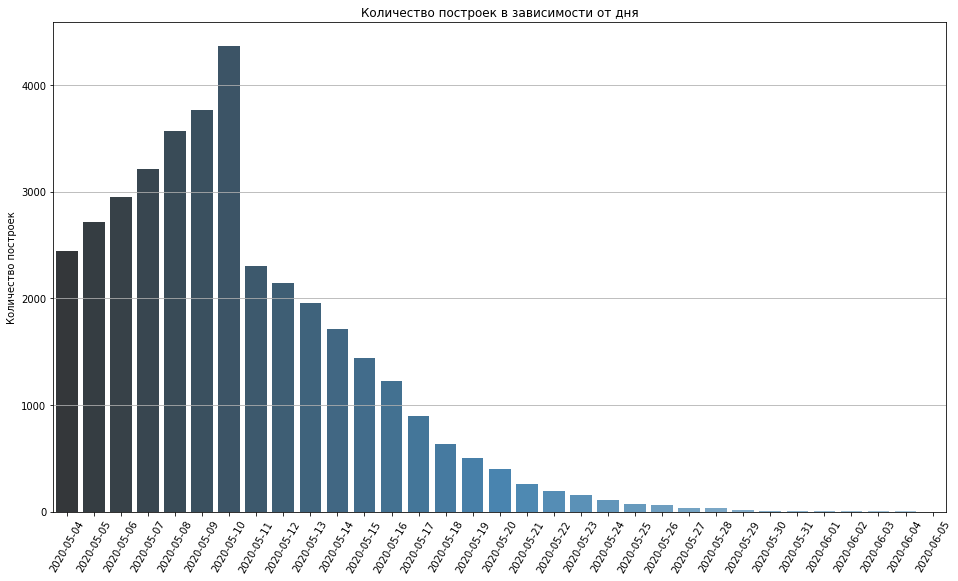

In [16]:
build_for_strategy(war)

**Для стратегии Builder характерные показатели построек**

Среднее количество построек на пользователя: 12.6
Общее количество построек: 23601


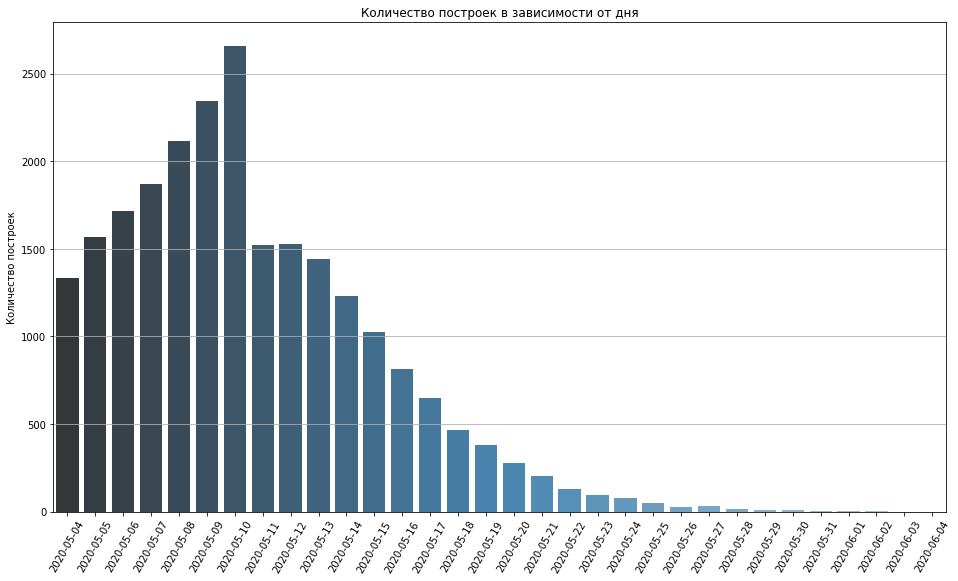

In [17]:
build_for_strategy(build)

**Для пользователей, не прошедших 1 уровень, характерные показатели построек**

Среднее количество построек на пользователя: 8.7
Общее количество построек: 67170


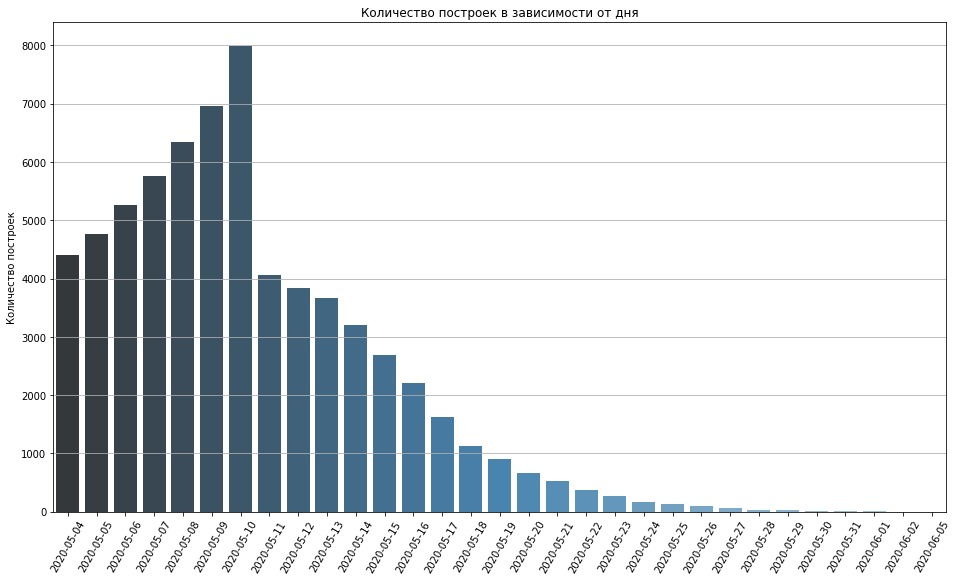

In [18]:
build_for_strategy(failed)

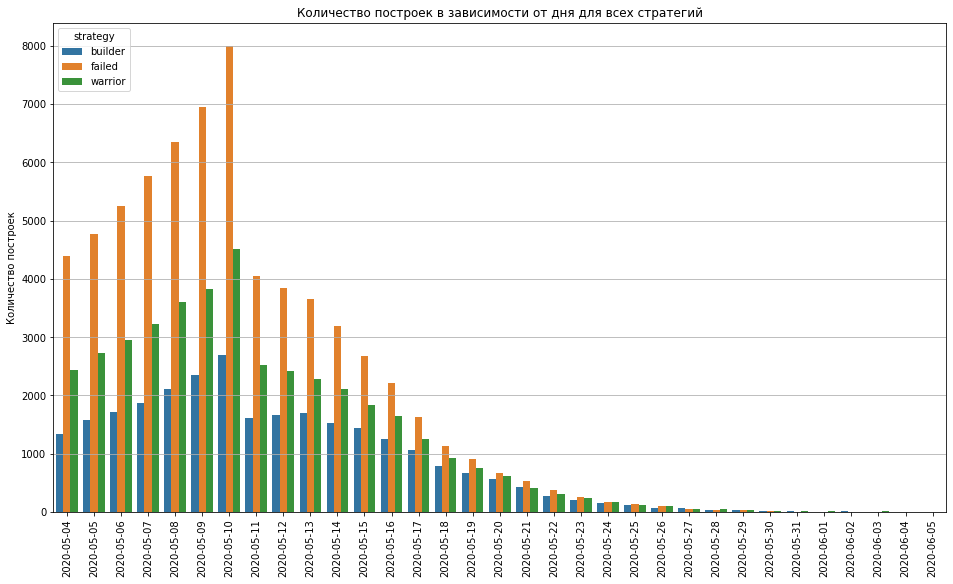

In [19]:
group = game.groupby(['strategy', 'event_date'])['event'].count().reset_index()
plt.figure(figsize=(16, 9))
plt.title('Количество построек в зависимости от дня для всех стратегий')
sns.barplot(data=group, x='event_date', y='event', hue='strategy')
plt.grid(axis='y')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Количество построек')
plt.show()

Количество построек сильно различается и от стратегии прохождения уровня:

 - стратегия воин: 9.4 постройки на человека;
 - стратегия строитель: 12.6 постройки на человека. 

Учитывая уклон пользователей в стратегию воин считаю, что нужно искать пути монетизации в этой стратегии, например, за просмотр рекламы делать скидку для покупки боевых единиц.


### найти время, затраченное каждым пользователем, на прохождение уровня

Для нахождения времени, затраченного на прохождение 1 уровня, сначала найдем:
 -	минимальное время постройки;
 -	время достижения первого уровня;
 -	вычтем время окончание первого уровня из времени минимальной постройки.


In [20]:
# срез по достигшим 1 уровня игрокам
up_first_lvl = game.query('strategy != "failed"')

# первое время постройки
min_date = up_first_lvl.groupby('user_id')['event_datetime']\
    .min().reset_index()\
    .rename(columns={'event_datetime': 'min_date'})

# время достижения 1 уровня
complete_date = up_first_lvl.query('event == "finished_stage_1"')\
    .groupby('user_id')['event_datetime']\
    .min().reset_index()\
    .rename(columns={'event_datetime': 'complete_date'})

In [21]:
# соединяем даты в одну таблицу
days_for_complete = min_date.merge(complete_date, how='left', on='user_id')

# расчитываем время на прохождение
days_for_complete['days'] = (days_for_complete['complete_date'] - days_for_complete['min_date']).astype('timedelta64[D]')

# добавляем стратегию прохождения
days_for_complete = days_for_complete.merge(user_event[['user_id', 'strategy']], how='left', on='user_id')

In [22]:
days_for_complete

,user_id,min_date,complete_date,days,strategy
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,6.0,warrior
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,12.0,warrior
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,12.0,warrior
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01,11.0,warrior
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39,6.0,warrior
...,...,...,...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-06 06:34:18,2020-05-19 04:03:24,12.0,warrior
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-04 17:46:05,2020-05-18 02:03:36,13.0,warrior
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,7.0,warrior
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,2020-05-12 13:01:52,8.0,warrior


In [23]:
print('Среднее время прохождение 1 уровня по статегии warrior:', round(days_for_complete.query('strategy == "warrior"')['days'].mean()))
print('Среднее время прохождение 1 уровня по статегии builder:', round(days_for_complete.query('strategy == "builder"')['days'].mean()))

Среднее время прохождение 1 уровня по статегии warrior: 11
Среднее время прохождение 1 уровня по статегии builder: 13


Возвращаясь к вопросу баланса игры, мы видим, что игроки по стратегии воин, в среднем быстрее на 2 дня достигают 1 уровня. Необходимо уровнять среднее время достижения 1 уровня для разных стратегий игры.

### разбить игроков на когорты и посмотреть метрику Retention Rate

В качестве когорты будем использовать первое действие игрока. У нас получается 7 когорт.

In [24]:
print(days_for_complete['min_date'].min())
print(days_for_complete['min_date'].max())

2020-05-04 00:00:03
2020-05-10 23:34:33


In [25]:
# добавим для каждого пользователя первую активность (когорту)
first_activity_date = game.groupby(['user_id'])['event_date'].min()
first_activity_date.name = 'first_activity_date'
game = game.join(first_activity_date,on='user_id') 

In [26]:
# меняем тип 
game['event_date'] = pd.to_datetime(game['event_date'])
game['first_activity_date'] = pd.to_datetime(game['first_activity_date'])

# найдем lifetime
game['cohort_lifetime'] = game['event_date'] - game['first_activity_date']
game['cohort_lifetime'] = game['cohort_lifetime'] / np.timedelta64(1, 'D')
game['cohort_lifetime'] = game['cohort_lifetime'].astype('int')

# посчитаем для каждой когорты количество активных пользователей на определённый lifetime
cohorts = game.groupby(['first_activity_date','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 

# найдём исходное количество пользователей в когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_date', 'user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

# объединим данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count,on='first_activity_date')
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users'] 
retention_pivot = cohorts.pivot_table(
    index='first_activity_date',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum') 

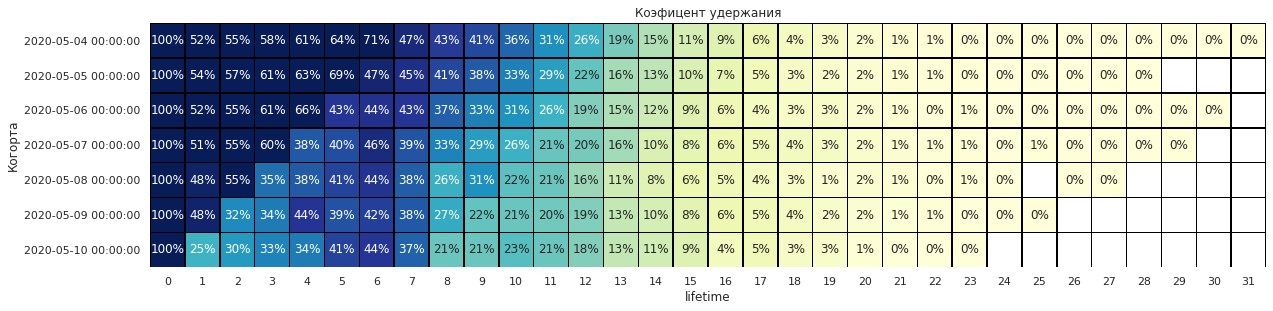

In [27]:
sns.set(style = 'white')
plt.figure(figsize = (20, 6))
plt.title('Коэфицент удержания')
sns.heatmap(retention_pivot, annot = True, fmt = '.0%', vmax=0.5,
            linewidths = 0.5, linecolor = 'black', 
            cmap = 'YlGnBu', cbar=0, square=True, yticklabels = retention_pivot.index)
plt.ylabel('Когорта')
plt.xlabel('lifetime')
plt.show()

Мы можем наблюдать плачевную статистику по удержанию пользователей в игре. Через 22 дня в нашу игру перестают заходить. Но возможет вариант, при котором игроки переходят на следующий уровень (и у нас просто нет этих данных) или время для события (например, постройки) сильно возрастает и нам нужно больше данных. Более корректно коэффициент удержания смотреть по времени захода игрока в приложение.

Так же 11 мая резко обавливается посещаемость, особенно в последней когорте от 2020-05-10 (75% пользователей). Возможно это связано с тем, что закончились длинные выходные на майские праздники и часть пользователей забросили нашу игру. Возможно стоит добавить послепраздничные ивенты для удержания. 

##  Маркетинговые метрики

In [28]:
print('Общай сумма расходов на маркетинг:', int(cost['cost'].sum()))
print('Сумма в зависимости от источника:')
cost_sum = cost.groupby('source')['cost'].sum().reset_index().sort_values(by='cost')
cost_sum

Общай сумма расходов на маркетинг: 7603
Сумма в зависимости от источника:


,source,cost
3,youtube_channel_reklama,1068.119204
0,facebook_ads,2140.904643
1,instagram_new_adverts,2161.441691
2,yandex_direct,2233.111449


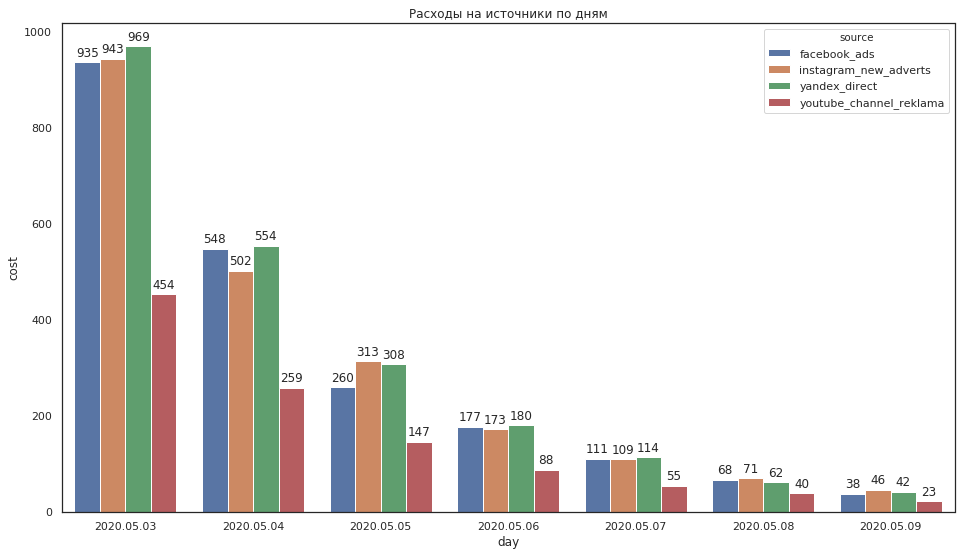

In [29]:
# переводим дату для графика
costt = cost['day']
time = costt.dt.strftime('%Y.%m.%d')

plt.figure(figsize=(16, 9))
plot = sns.barplot(x = time, y="cost", hue="source", data=cost)
for p in plot.patches:
    plot.annotate(format(int(p.get_height())),
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',  va = 'center',
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Расходы на источники по дням')
plt.show()

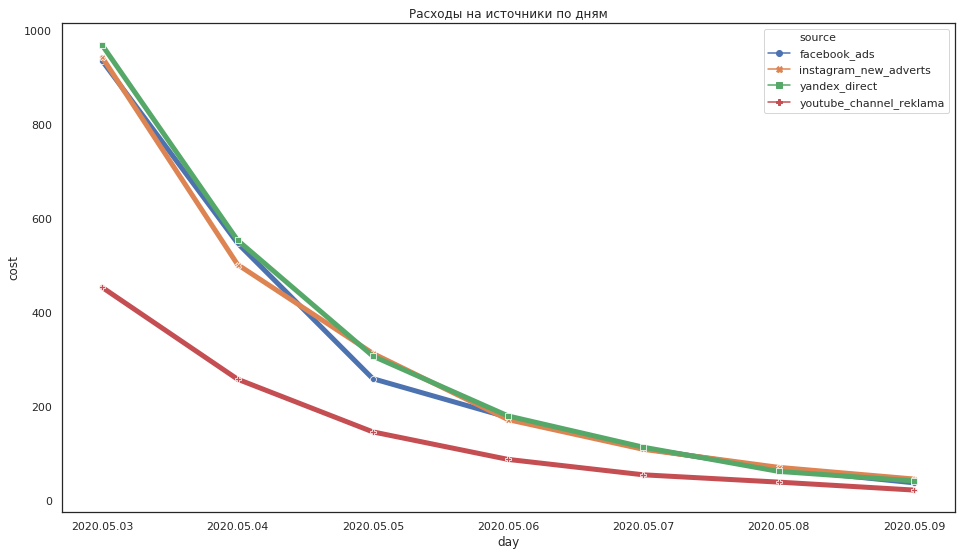

In [30]:
plt.figure(figsize=(16, 9))
plot = sns.lineplot(x = time, y="cost", hue="source", data=cost, style="source", markers=True, dashes=False, linewidth = 5)
plt.title('Расходы на источники по дням')
plt.show()

Видно, как маркетинговая компания проходила на протяжении 7 дней, с постепенным уменьшением вложений. На источник "youtube" вложения были примерно в два раза меньше, чем на другие источники.

Поскольку наша модель монетизации - это реклама при выборе постройки, за пожизненную ценность клиента (LTV) будем считать количество построек на пользователя, за когорты примем источник трафика.

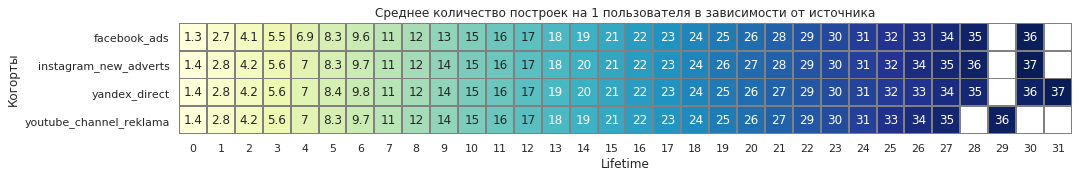

In [31]:
# присоеденим к пользователям источники перехода
game = game.merge(user_sourse, how='left', on='user_id')

# сводная таблица по источникам
grp = game.query('event == "building"')\
    .groupby(['source', 'event_date', 'cohort_lifetime'])\
    .agg({'user_id': 'nunique', 'event': 'count'}).reset_index()

# находим количество построек на 1 пользователя
grp['mean'] = grp['event'] / grp['user_id']
ltv = grp.pivot_table(index='source', columns='cohort_lifetime', values='mean', aggfunc='mean')
ltv = ltv.cumsum(axis = 1)

#строим тепловую карту
sns.set(style = 'white')
plt.figure(figsize=(16, 5))
plt.title('Среднее количество построек на 1 пользователя в зависимости от источника')
    
sns.heatmap(ltv, annot=True, linewidths=1, linecolor='gray', 
                square=True,
                cbar=0, cmap = 'YlGnBu') 
plt.xlabel('Lifetime')
plt.ylabel('Когорты')
plt.show()

Не важно из какого источника пришел пользователь, ведь монетизация с пользователя не зависит от источника. Тогда важно посмотреть, из какого источника пользователь стоит нам дешевле всего (САС).

In [32]:
# за когорты возьмем источник, найдем количетво юзеров по каждому источнику
cohort_sizes = game.groupby('source').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes = cohort_sizes.merge(cost_sum, how='left', on='source')
cohort_sizes['cac'] = cohort_sizes['cost'] / cohort_sizes['user_id']
cohort_sizes.sort_values(by='cac')

,source,user_id,cost,cac
3,youtube_channel_reklama,2686,1068.119204,0.397662
2,yandex_direct,4817,2233.111449,0.463590
1,instagram_new_adverts,3347,2161.441691,0.645785
0,facebook_ads,2726,2140.904643,0.785365


Зато цена на привлечение 1 пользователя зависит от источника маркетинга. Источник, в который мы вложили минимальный ресурс, оказался самым выгодным по стоимости привлечения пользователя. Очевидный маркетинговый просчет на лицо :)

Поскольку мы не знаем прибыль с нашей игры, невозможно объективно посчитать возврат вложений на маркетинг (ROMI). Мы так же и не знаем основную модель монетизации, будет ли играть платной, будут ли внутреигровые транзакции, сколько стоит 1 показ рекламы, и на какой мобильной платформе (Android или iOS). За прибыль возьмем сумму, заработанную за просмотр рекламы на 28 день, когда LTV уже практически достигает своего максимума. За сумму просмотра 1 рекламы примем - 0.025. 

In [33]:
ltv_27day = ltv[27].reset_index().rename(columns={27: 'ltv_day27'})
ltv_27day['ltv_day27'] = ltv_27day['ltv_day27'].apply(lambda x: x * 0.025)
cohort_sizes = cohort_sizes.merge(ltv_27day, how='left',on='source')
cohort_sizes['ROMI'] = cohort_sizes['ltv_day27'] / cohort_sizes['cac']
cohort_sizes

,source,user_id,cost,cac,ltv_day27,ROMI
0,facebook_ads,2726,2140.904643,0.785365,0.856374,1.090415
1,instagram_new_adverts,3347,2161.441691,0.645785,0.863067,1.336463
2,yandex_direct,4817,2233.111449,0.463590,0.840192,1.812360
3,youtube_channel_reklama,2686,1068.119204,0.397662,0.871178,2.190751


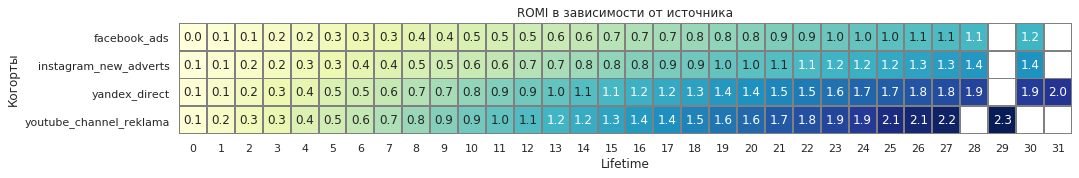

In [34]:
ltv_for_romi = ltv * 0.025
cohort_sizes= cohort_sizes.set_index('source')
romi = ltv_for_romi.merge(cohort_sizes['cac'], on = 'source')
romi = romi.div(romi['cac'], axis = 0).drop(columns = 'cac')

#строим тепловую карту
sns.set(style = 'white')
plt.figure(figsize=(16, 4))
plt.title('ROMI в зависимости от источника')
    
sns.heatmap(romi, annot=True, linewidths=1, linecolor='gray', fmt = '.1f',
                square=True,
                cbar=0, cmap = 'YlGnBu') 
plt.xlabel('Lifetime')
plt.ylabel('Когорты')
plt.show()


Вознаграждаемая видеореклама — это самый современный и популярный формат. Мы предлагаете игроку ускоренную постройку/игровую валюту/новое оружие за просмотр ролика. Плюс этого способа в том, что по сравнению с другими, он дает самый высокий доход: за 1000 показов в Штатах вы можете получать 25-30$ (по данным Unity Ads - платформы для продвижения игр и мобильных приложений). Так мы видим что пользователь окупается абсолютно со всех источников, но:
 - источник facebook почти не приносит прибыли;
 - источник instagram приносит прибыль 30 % от вложений, 
 - источник yandex приносит прибыль 80% от вложений,
 - источник youtube приносит прибыль в виде 119% от вложений.

Выбор источника трафика сильно влияет на прибыль от игры, при планировании модели маркетинга необходимо обязательно учесть этот фактор.

## Проверка гипотез

### различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком;

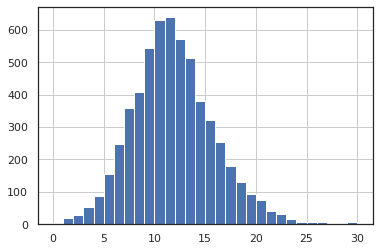

In [35]:
days_for_complete['days'].hist(bins=30)
plt.show()

In [36]:
print(np.var(days_for_complete.query('strategy == "warrior"'), ddof=1))
print(np.var(days_for_complete.query('strategy == "builder"'), ddof=1))

days    16.860053
dtype: float64
days    12.437774
dtype: float64


- H₀ (нулевая гипотеза) - среднее время прохождения 1 уровня в зависимости от стратегии не отличается;
- H₁ - среднее время в зависимости от стратегии прохождения 1 уровня отличается.

Уровень значимости примем за 5%.

In [37]:
days_for_complete
warrior = days_for_complete.query('strategy == "warrior"')
builder = days_for_complete.query('strategy == "builder"')
print('Среднее значение времени прохождения 1 уровня стратегии воин:', round(warrior['days'].mean()))
print('Среднее значение времени прохождения 1 уровня стратегии строитель', round(builder['days'].mean()))

Среднее значение времени прохождения 1 уровня стратегии воин: 11
Среднее значение времени прохождения 1 уровня стратегии строитель 13


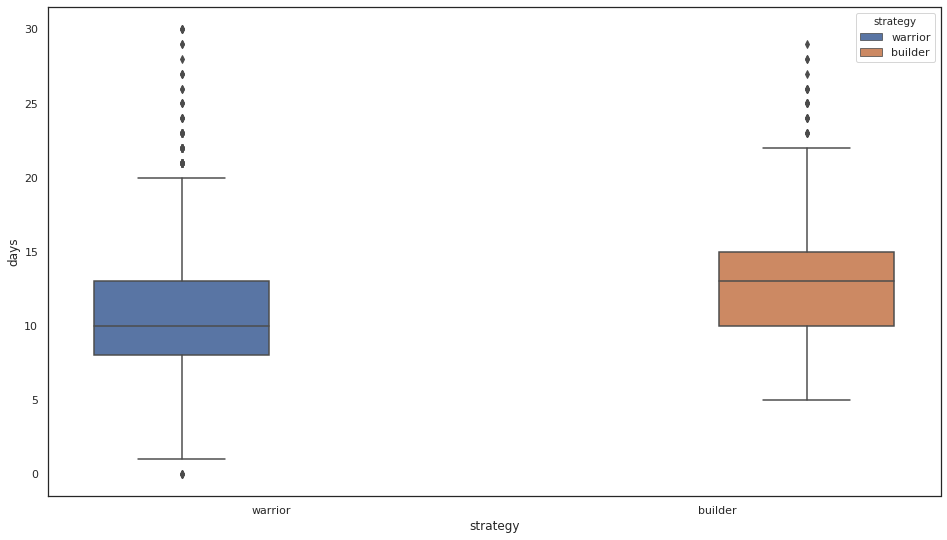

In [38]:
plt.figure(figsize=(16, 9))
sns.boxplot(x="strategy", y="days", data=days_for_complete, hue='strategy')
plt.show()

In [39]:
alpha = 0.05
results = st.ttest_ind(warrior['days'], builder['days'])
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.8882835392369192e-97
Отвергаем нулевую гипотезу


Попробуем провести тест еще раз, но предварительно "срезав" выбросы:

In [40]:
print('Для 95% пользователей характерное количество дней для достижения 1 уровня:', round(np.percentile(warrior['days'], 95)))
warrior = warrior.query('16 >= days > 1')

Для 95% пользователей характерное количество дней для достижения 1 уровня: 18


In [41]:
print('Для 97% пользователей характерное количество дней для достижения 1 уровня:', round(np.percentile(builder['days'], 95)))

builder = builder.query('20 > days')

Для 97% пользователей характерное количество дней для достижения 1 уровня: 20


In [42]:
results = st.ttest_ind(warrior['days'], builder['days'])
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.7863451175041694e-170
Отвергаем нулевую гипотезу


В случае с выбросами и без мы отвергли нулевую гипотезу, это значит что статистически доказано, что в зависимости от стратегии прохождения изменяется и время прохождения 1 уровня. Необходимо сообщить разработчикам о том, что в игре нарушен баланс в зависимости от выбора стратегии.

### различии среднего количества построек между пользователями реализовавшими проект и пользователями победившими другого игрока

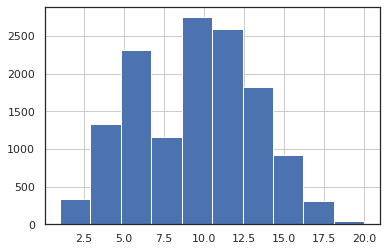

In [43]:
user_event['building'].hist(bins=10)
plt.show()

In [44]:
user_event.to_csv('user_event')
user_event

event,user_id,building,finished_stage_1,project,strategy
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0,0,failed
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0,0,failed
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0,0,failed
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,1,0,warrior
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0,0,failed
...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9,1,0,warrior
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16,0,0,failed
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,9,1,0,warrior
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7,0,0,failed


Для проверки гипотезы будем использовать метод: t-критерий Стьюдента.

- H₀ (нулевая гипотеза) - среднее количество построек в зависимости от стратегии прохождения не отличается;
- H₁ - среднее количество построек в зависимости от стратегии прохождения отличается.

Уровень значимости примем за 5%.

In [45]:
user_wariror = user_event.query('strategy == "warrior"')
user_builder = user_event.query('strategy == "builder"')
print('Среднее количество построек стратегии воин:', round(user_wariror['building'].mean()))
print('Среднее количество построек стратегии строитель', round(user_builder['building'].mean()))

Среднее количество построек стратегии воин: 9
Среднее количество построек стратегии строитель 13


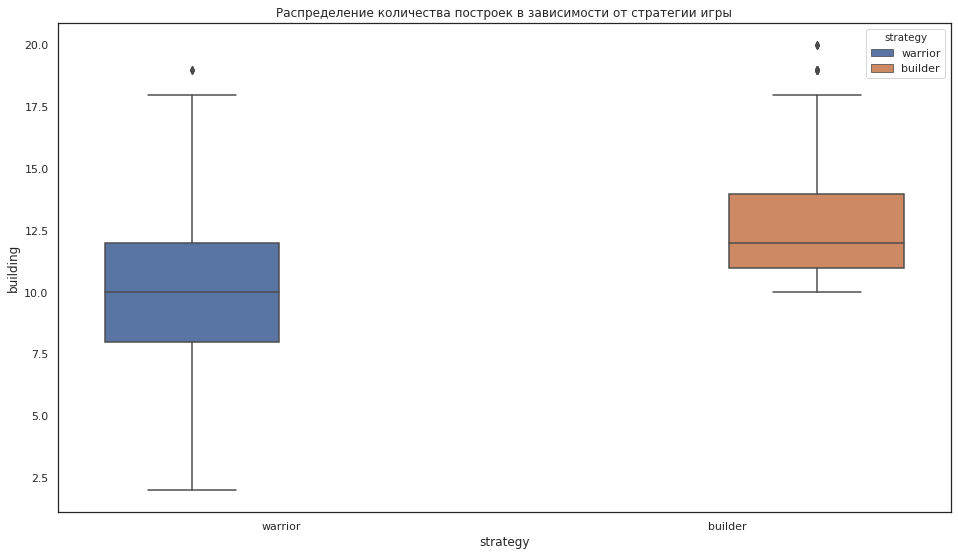

In [46]:
plt.figure(figsize=(16, 9))
plt.title('Распределение количества построек в зависимости от стратегии игры')
sns.boxplot(x="strategy", y="building", data=user_event.query('strategy != "failed"'), hue='strategy')
plt.show()

В данных присутствует несколько выбросов, которые не сильно искажают среднее, поэтому обрезать их нет смысла.

In [47]:
results = st.ttest_ind(user_wariror['building'], user_builder['building'])
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0
Отвергаем нулевую гипотезу


p-значение = 0, ошибка 1 рода невозможна, и средние значения в выборке отличаются настолько, что мы можем приянть альтернативную гипотезу. Проверим значение данных на непараметрическом критерии статистической значимости для определения разности количества построек в зависимости от стратегии игры тестом Манна-Уитни.

In [48]:
results = st.mannwhitneyu(user_wariror['building'].values, user_builder['building'].values)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.605963137511153e-305
Отвергаем нулевую гипотезу


На основании теста мы также отвергаем нулевую гипотезу. Количество построек отличается в зависимости от выбранной стратегии игры.

## Общий вывод и рекомендации

Для анализа вселенной игры «Космические братья» нам было предоставлены данные с достижением игроком первого уровня, источниками привлечения каждого игрока и маркетинговые расходы на источники. Для начала мы выявили, что 7759 (57%) пользователей из 13576 не дошли до первого уровня. Необходимо дополнительно анализировать почему конверсия в первый уровень такая низкая, и по возможности, работать над ее ростом. Из оставшихся 5817 (43%) игроков, прошедших первый уровень мы можем выделить две основные стратегии его достижения:

 - Warrior(воин) - для этой стратегии прохождения характерна победа над первым врагом, 3951 (29%) выбрали эту стратегию;
 - Builder(строитель) - для этой стратегии прохождения характерна реализация проекта - разработка орбитальной сборки спутников, 1866 (14%) выбрали эту стратегию.

Мы наблюдаем явный перекос игроков в пользу стратегии воин, причинами этого могут служить:

 - стратегия воин банально интереснее;
 - пользователи выбирают стратегию воин, так как в ней нужно меньше строить, и соответственно смотреть меньше рекламы;
 - в игре нарушен баланс между стратегиями, поэтому игроки выбирают более выгодную для дальнейшего развития.
 
Для анализа последней причины мы оценили среднее время прохождение пользователем 1 уровня и оказалось, что:

 - воин в среднем тратит на прохождение 10.6 дней;
 - строитель 13 дней.

Необходимо обратить внимание разработчиков на баланс в зависимости от прохождения стратегии, поскольку, играя по стратегии воин, мы достигаем первого уровня на 2.5 дня быстрее. 

Так же в процессе работы мы оценили коэффициент удержания игроков, где было выявлено, что на 22 день для 99% пользователей игра перестает быть интересна, они перестают строить новые объекты, но важно отметить, что для более корректного подсчета этой метрики необходимы данные по заходу каждого пользователя в игру.

Оценивая маркетинговые метрики важно помнить, что на данный момент наша модель монетизации, это показ рекламы на экране с выбором типа объекта для постройки. Количество построенных объектов зависит и от стратегии игрока, где для каждой стратегии характерно:

 - воин - 9.4 постройки на игрока;
 - строитель - 12.6 постройки на игрока;
 - игроки, не прошедшие 1 уровень - 8.7 постройки на игрока;

Важно заметить, что возможно из-за баланса игроки в 2 раза чаще выбирают стратегию воин, хотя игроки стратегии строитель окупают наши вложения быстрее за счет больших построек, и соответственно большей просмотренной рекламы. Важно сообщить разработчикам, что-либо нам нужно монетизировать стратегию воин, либо сделать перекос в сторону стратегии строитель, даже возможно в ущерб балансу между стратегиями.

В процессе анализа посчитали расходы на источники маркетинга (4 источника), общая сумма составляет 7603, на 3 источника расходы были распределены примерно одинаково, на 1 источник (youtube) расходы были в 2 раза меньше. В зависимости от источников LTV примерно одинаковый, зато заметно отличается цена привлечения на 1 игрока (САС), так источник, в который вложения были минимальны (youtube), оказался самым выгодным, необходимо сообщить отделу маркетинга о необходимости смены приоритета расходов на источники.

Не имея данных о доходах, чтобы прикинуть дальнейшую модель монетизации, мы приблизительно посмотрели, как окупается пользователь на крайний lifetime в наших данных в зависимости от источника, самым выгодным источником так же оказался youtube: 

  - источник facebook почти не приносит прибыли;
  - источник instagram приносит прибыль 30 % от вложений, 
  - источник yandex приносит прибыль 80% от вложений,
  - источник youtube приносит прибыль в виде 119% от вложений
 
В итоге работы мы проверили 2 гипотезы:

 1. различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком

В результате проверки был выявлен статистически значимый результат, что время прохождения зависит от выбранной стратегии, как с выбросами, так и без. Что и подтверждает нашу ранее выдвинутой версии о неравном балансе (стратегия воин банально профитней для достижения 1 уровня).

 2. различии среднего количества построек между пользователями, реализовавшими проект и пользователями, победившими другого игрока
 
В результате проверки был выявлен статистически значимый результат, количество построек зависит от стратегии. Особенно это важно, что основной доход мы получаем с рекламы при выборе постройки, при этом стратегия в которой в среднем приносит нам больше прибыли менее профитная.

**Рекомендации:**

Рекомендации буду перечислять в порядке приоритета, от больших к меньшим:

1. Более подробно оценить коэффициент удержания, если через 22 дня 99% пользователей перестает заходить в игру, то нужно что-то менять в геймплее или закрывать проект. 22 дня для покорения вселенной в "Космических братьях" очень мало :)

2. Подобрать подходящую модель монетизации, тут я могу предложить несколько пунктов для улучшения

 - рекламу показывать не во время выбора постройки, тк пользователю может мешать такой показ, а ввести добровольно-принудительный показ, что бы просмотр рекламы был неосознанным выбором самого игрока (например, за просмотр рекламы уменьшается время или сумма постройки)
 
 - необходимо монетизировать стратегию воин (по аналогичной схеме добровольно-принудительного показа рекламы)
 
 - ввести другие источники дохода помимо просмотра рекламы (например, внутреигровые покупки)
 
в качестве основной модели монетизации игры я предлагаю модель Free-to-play, потому, что на рынке мобильных игр это давно зарекомендовавшая себя модель, но добавить в игру возможность внутреигровых добровольных покупок и улучшений

3. Пересмотреть затраты на источники привлечения клиентов в пользу наиболее выгодных.

4. Увеличить конверсию прохождения 1 уровня

5. Сбалансировать стратегии прохождения игры

**Расчеты по доходам:**

По результатам исследования данных за период с 2020-05-04 по 2020-06-05 можно сделать следующие выводы по источникам(расходы на маркетинг за период 2020-05-03 по 2020-05-09):

- facebook:
 затрачено на маркетинг: 2 140.904643
 заработано по итогам периода: 2 569.084643
 прибыль от источника: 428.18 (20% от вложений) 
 
- instagram
 затрачено на маркетинг: 2 161.441691
 заработано по итогам периода: 3 026.021691
 прибыль от источника: 864.58 (40% от вложений)
 
- facebook
 затрачено на маркетинг: 2 140.904643
 заработано по итогам периода: 4 281.809286
 прибыль от источника: 2 140.904643 (100% от вложений)
 
- youtube
 затрачено на маркетинг: 1 068.119204
 заработано по итогам периода: 2 456.678408
 прибыль от источника: 1 388.559204 (130% от вложений)